# Airbnb Data Mining Notebook

In this notebook we are going to deal with data from a well-known residential rental application, Airbnb. Specifically, based on the data for the Athens area for 3 months of 2019 (February, March and April), we are going to answer the following question: 
* What is the most common type of room_type for our data?
* Plot graphs showing the fluctuation of prices for the 3 month period.
* What are the top 5 neighborhoods with the most reviews?
* What is the neighborhood with most real estate listings?
* How many entries are per neighborhood and per month?
* Plot the histogram of the neighborhood_group variable.
* What is the most common type of room (room_type)?
* What is the most common room type (room_type) in each neighborhood (neighborhood_group)?
* What is the most expensive room type?

## Import Libraries

In [1]:
# Ignoring unnecessory warnings
import warnings
warnings.filterwarnings("ignore")  
# Specialized container datatypes
import collections
# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For large and multi-dimensional arrays
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Natural language processing library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
# For basic cleaning and data preprocessing 
import re
import string 
# Communicating with operating and file system
import os
# Machine learning libary
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# For wordcloud generating 
from wordcloud import WordCloud

ImportError: No module named nltk

## Load Dataset

Read the data using pandas' read_csv method and let's look at the dataset info to see if everything is alright.

In [2]:
DATASET = "./data/train.csv"
df = pd.read_csv(DATASET)
df.head()

,id,month,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,...,amenities,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy
0,10595,February,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$71.00,1,294,17,2011-05-20,2019-01-12,96.0,t,strict_14_with_grace_period
1,10988,February,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$82.00,1,0,31,2012-10-21,2017-11-23,92.0,t,strict_14_with_grace_period
2,10990,February,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$47.00,1,282,27,2012-09-06,2019-02-01,97.0,t,strict_14_with_grace_period
3,10993,February,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$37.00,1,286,42,2012-09-24,2019-02-02,97.0,t,strict_14_with_grace_period
4,10995,February,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$47.00,2,308,16,2010-07-08,2019-01-11,95.0,t,strict_14_with_grace_period


For the time being, null values won't be discared. That's why in case we deleted all the null objects, we would exclude a sizeable portion of the data set, and maybe without any meaningful reason. So, we are going to tackle each question step by step and only in case of need we will discard null objects.

## Question 1.1

What is the most common type of room_type for our data?

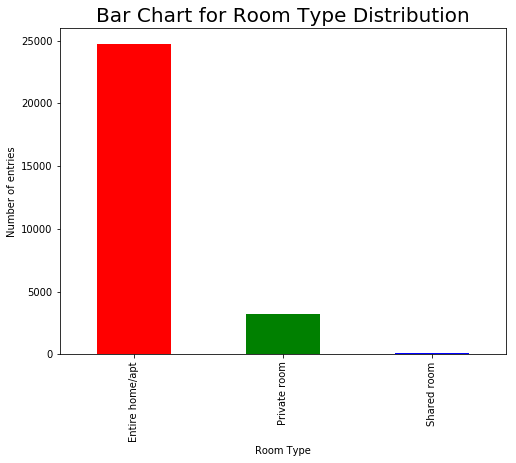

In [3]:
df['room_type'].value_counts().plot(kind = 'bar', color=['red', 'green', 'blue'], figsize = (8, 6))
plt.title('Bar Chart for Room Type Distribution', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('Number of entries')
plt.show()

It is crystal clear that the most common type of rooms is 'Entire home/apartment'

In [4]:
print('Number of entries for "Entire home/apartment": {}'.format(max(df['room_type'].value_counts())))

Number of entries for "Entire home/apartment": 24765


## Question 1.2

Plot graphs showing the fluctuation of prices for the 3 month period.

In [5]:
# In order to plot numerical data we have to clean 'price' column by remove '$' symbol in each row
def remove_dollar(row):
    if row[0] == '$':
        return row[1:]
    return row

df['price'] = df['price'].apply(lambda row: float(remove_dollar(row).replace(',','')))

In [6]:
# Calculate mean price for each month
mean_prices = []
months = ['February', 'March', 'April']
for month in months:
    mean_prices.append(np.mean(df.loc[df['month'] == month]['price']))

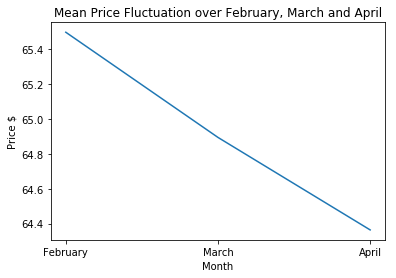

In [7]:
# Plot price fluctuation over the 3 months
plot = plt.plot(months, mean_prices)
plt.xlabel('Month')
plt.ylabel('Price $')
plt.title('Mean Price Fluctuation over February, March and April')
plt.show()

In [8]:
for i, month in enumerate(months):
    print("Mean price in month {}: ${:.2f}".format(month, mean_prices[i]))

Mean price in month February: $65.50
Mean price in month March: $64.89
Mean price in month April: $64.36


## Question 1.3

 What are the top 5 neighborhoods with the most reviews?

Text(0.5,1,'Distribution of reviews in the top neighbourhoods')

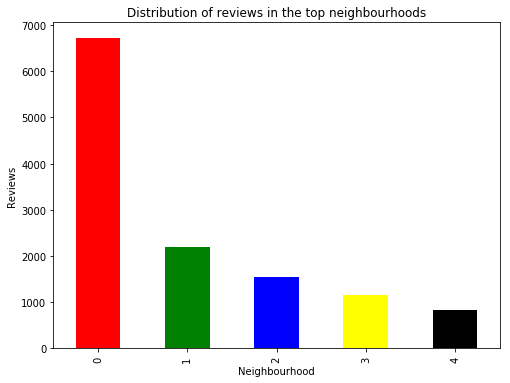

In [9]:
top_neighs = df['number_of_reviews'].value_counts().head(5)
top_neighs.plot(kind = 'bar', color=['red', 'green', 'blue', 'yellow', 'black'], figsize = (8, 6))
plt.xlabel('Neighbourhood')
plt.ylabel('Reviews')
plt.title('Distribution of reviews in the top neighbourhoods')

In [10]:
print"Top 5 neighbourhoods are \n\n{}".format(df['neighbourhood'].value_counts().head(5))

Top 5 neighbourhoods are 

Plaka          3143
Neos Kosmos    2377
Koukaki        2318
Kolonaki       1722
Pangrati       1702
Name: neighbourhood, dtype: int64


## Question 1.4

What is the neighborhood with most real estate listings?


In [11]:
res = df['neighbourhood'].value_counts()
neig = res.keys().tolist()[0]
n_props = res.tolist()[0]
print("The neighbourhood with the most listings is {} with {} properties".format(neig, n_props))

The neighbourhood with the most listings is Plaka with 3143 properties


## Question 1.5


How many entries are per neighborhood and per month?


#### Entries per month

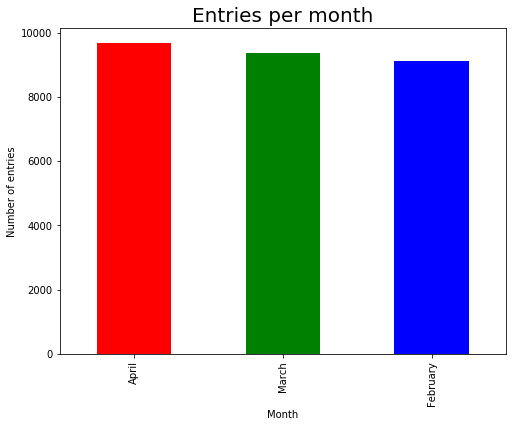

In [12]:
df['month'].value_counts().plot(kind = 'bar', color=['red', 'green', 'blue'], figsize = (8, 6))
plt.title('Entries per month', fontsize = 20)
plt.xlabel('Month')
plt.ylabel('Number of entries')
plt.show()

In [13]:
months = df['month'].value_counts().keys().tolist()
values = df['month'].value_counts().tolist()

print('Entries per month\n')
for i,month in enumerate(months):
    print('{1} in {0}'.format(month, values[i]))

Entries per month

9661 in April
9361 in March
9100 in February


#### Entries per neighbourhood

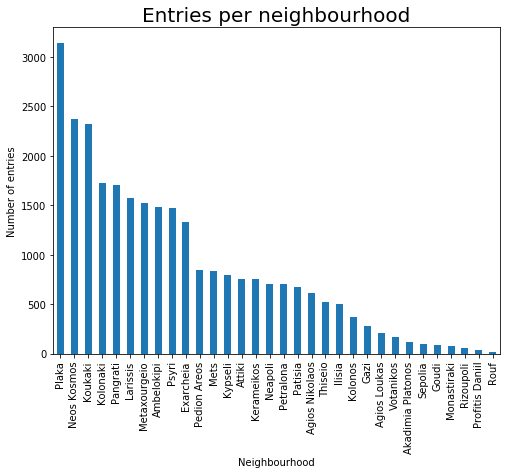

In [14]:
df['neighbourhood'].value_counts().plot(kind = 'bar', figsize = (8, 6))
plt.title('Entries per neighbourhood', fontsize = 20)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of entries')
plt.show()

In [17]:
neighbourhoods = df['neighbourhood'].value_counts().keys().tolist()
values = df['neighbourhood'].value_counts().tolist()

print('Entries per month\n')
for i,neighbourhood in enumerate(neighbourhoods):
    print('{1} in {0}'.format(neighbourhood, values[i]))

Entries per month

3143 in Plaka
2377 in Neos Kosmos
2318 in Koukaki
1722 in Kolonaki
1702 in Pangrati
1577 in Larissis
1527 in Metaxourgeio
1482 in Ambelokipi
1472 in Psyri
1330 in Exarcheia
845 in Pedion Areos
838 in Mets
791 in Kypseli
758 in Attiki
756 in Kerameikos
706 in Neapoli
700 in Petralona
670 in Patisia
611 in Agios Nikolaos
520 in Thiseio
502 in Ilisia
370 in Kolonos
282 in Gazi
209 in Agios Loukas
163 in Votanikos
114 in Akadimia Platonos
97 in Sepolia
87 in Goudi
81 in Monastiraki
59 in Rizoupoli
40 in Profitis Daniil
12 in Rouf


## Question 1.6

Plot the histogram of the neighborhood_group variable.


In [ ]:
df.hist(column='neighbourhood', by='id', figsize=(12,4))


## Question 1.7

What is the most common type of room (room_type)?
